## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes

## Load dataset

In [2]:
df = pd.read_csv(f'C:/Users/Skyline/solar-challenge-week1/data/benin-malanville.csv')

## Summary Statistics & Missing-Value Report

In [3]:
# Summary Statistics
print("Summary Statistics:")
display(df.describe())

# Missing Values
missing = df.isna().sum()
print("\nMissing Values:")
display(missing)
print("\nColumns with >5% Missing:")
display(missing[missing > len(df) * 0.05] / len(df))

Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN



Missing Values:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


Columns with >5% Missing:


Comments    1.0
dtype: float64

## Outlier Detection & Basic Cleaning

In [4]:
# Compute Z-scores for key columns
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)
print(f"Rows with outliers (|Z|>3): {outliers.sum()}")

# Impute missing values with median for key columns
for col in key_cols:
    df[col] = df[col].fillna(df[col].median())

# Export cleaned DataFrame
df.to_csv(f'data/benin_clean.csv', index=False)

Rows with outliers (|Z|>3): 7740


## Time Series Analysis

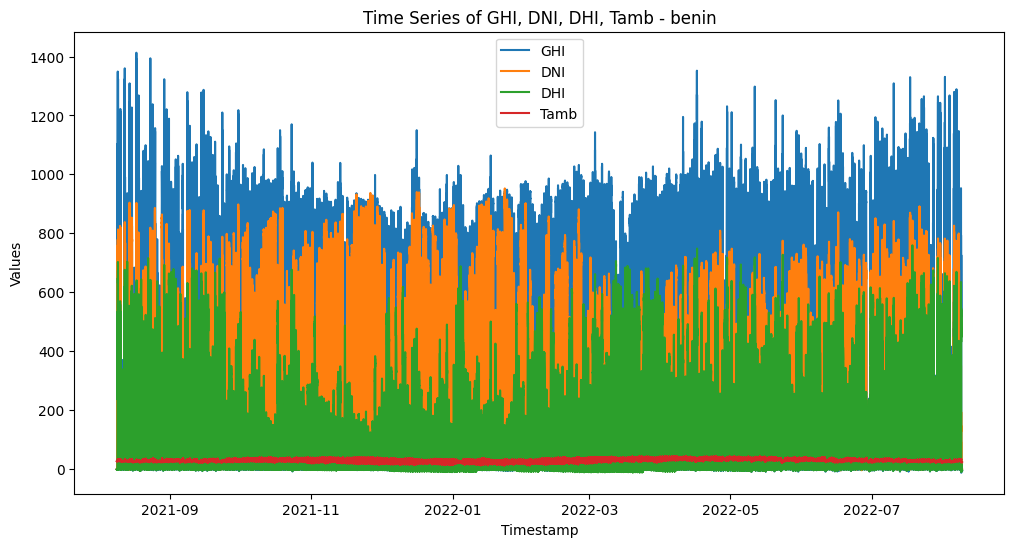

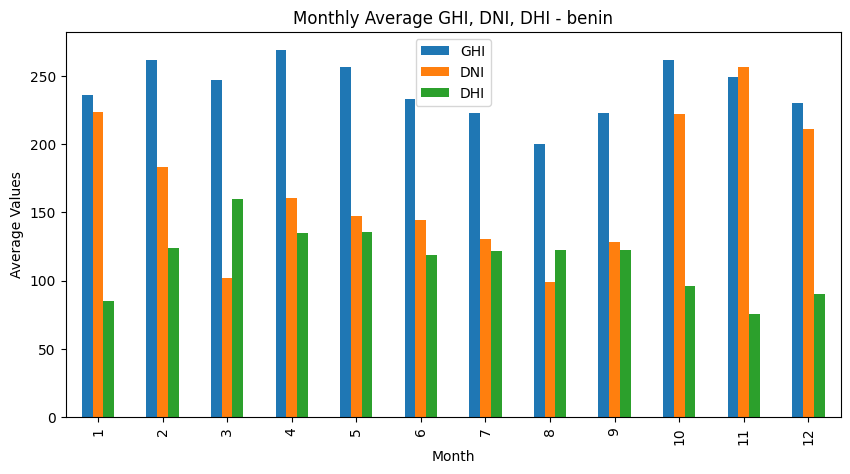

In [27]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot GHI, DNI, DHI, Tamb vs Timestamp
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title(f'Time Series of GHI, DNI, DHI, Tamb - benin')
plt.legend()
plt.show()

# Monthly trends
df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI']].mean()
monthly_avg.plot(kind='bar', figsize=(10, 5))
plt.title(f'Monthly Average GHI, DNI, DHI - benin')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.show()

## Cleaning Impact

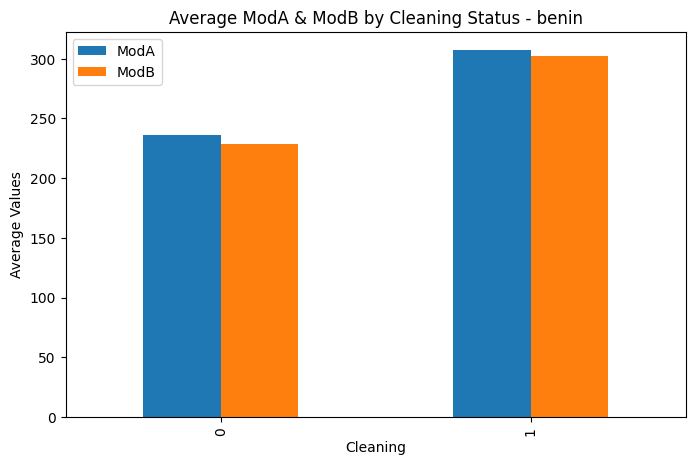

In [28]:
# Group by Cleaning flag and plot ModA, ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_impact.plot(kind='bar', figsize=(8, 5))
plt.title(f'Average ModA & ModB by Cleaning Status - benin')
plt.xlabel('Cleaning')
plt.ylabel('Average Values')
plt.show()

## Correlation & Relationship Analysis

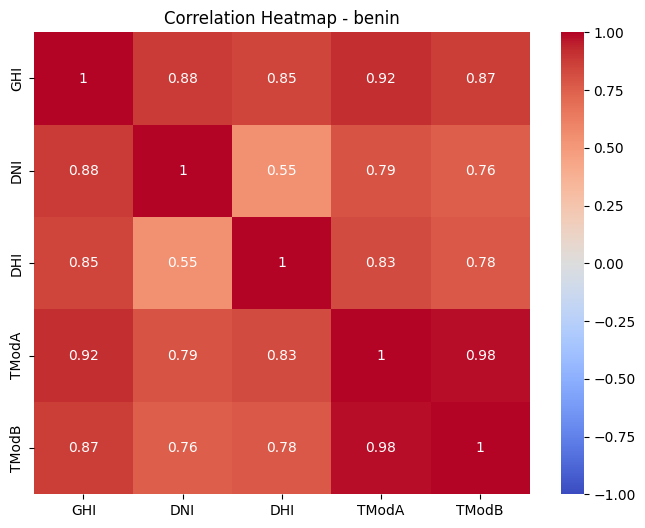

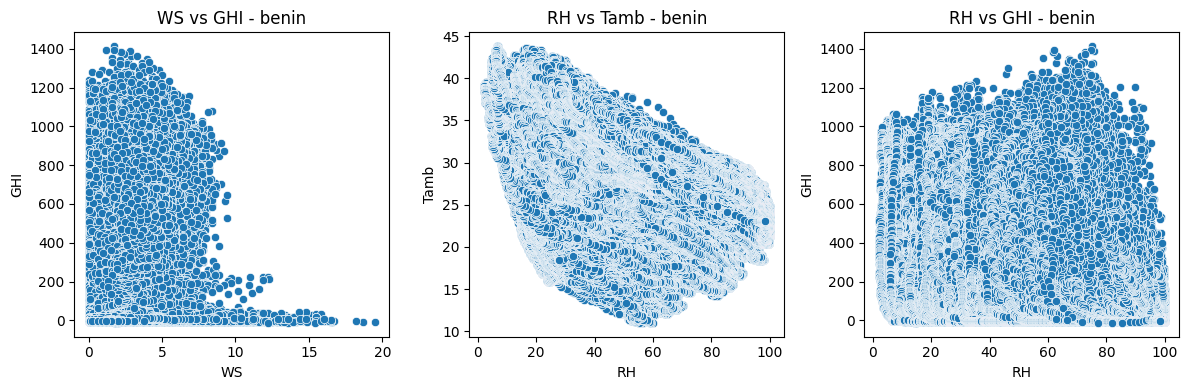

In [29]:
# Correlation heatmap
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Heatmap - benin')
plt.show()

# Scatter plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title(f'WS vs GHI - benin')
plt.subplot(1, 3, 2)
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title(f'RH vs Tamb - benin')
plt.subplot(1, 3, 3)
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title(f'RH vs GHI - benin')
plt.tight_layout()
plt.show()

## Wind & Distribution Analysis

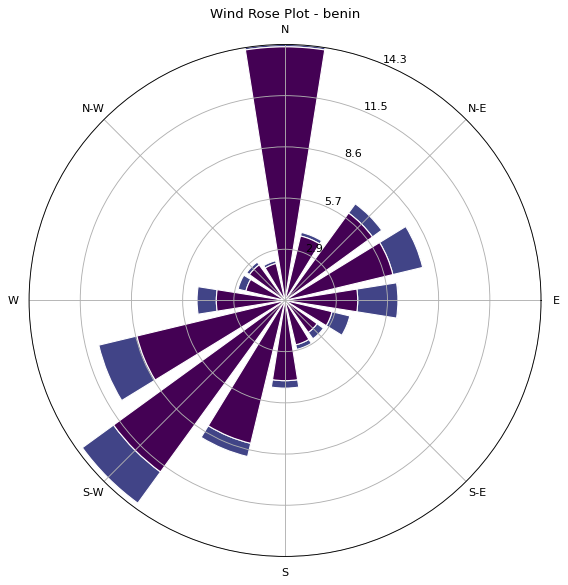

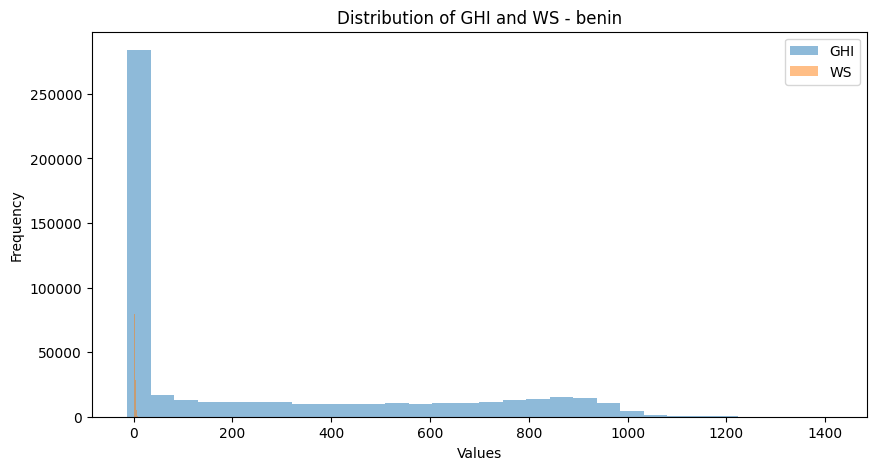

In [30]:
# Wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
plt.title(f'Wind Rose Plot - benin')
plt.show()

# Histograms
plt.figure(figsize=(10, 5))
plt.hist(df['GHI'], bins=30, alpha=0.5, label='GHI')
plt.hist(df['WS'], bins=30, alpha=0.5, label='WS')
plt.legend()
plt.title(f'Distribution of GHI and WS - benin')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

## Temperature Analysis

In [24]:
# RH vs Tamb scatter plot (already included above, but add observations)
print("Observations on RH vs Tamb and GHI:")
print("- High RH may correlate with lower Tamb or GHI due to cloud cover.")

Observations on RH vs Tamb and GHI:
- High RH may correlate with lower Tamb or GHI due to cloud cover.


## Bubble Chart

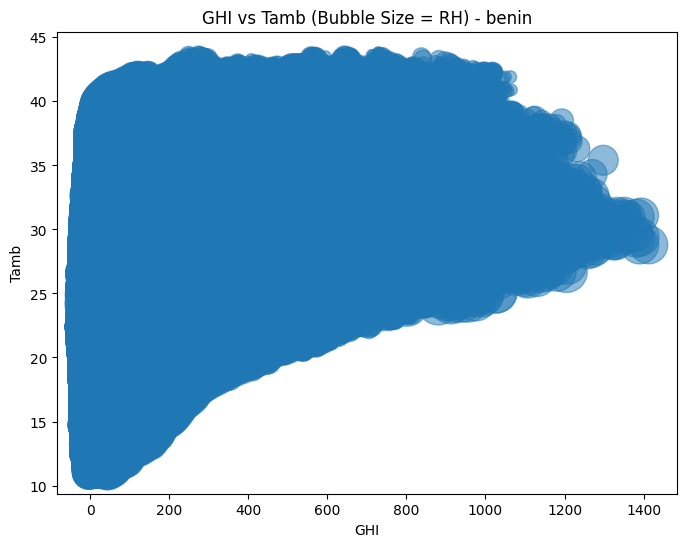

In [31]:
# GHI vs Tamb with bubble size = RH
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title(f'GHI vs Tamb (Bubble Size = RH) - benin')
plt.show()